Loading and preparing MNIST dataset...
Building CNN model...


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Training model (this may take a few minutes)...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.9021 - loss: 0.3170 - val_accuracy: 0.9838 - val_loss: 0.0590
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9684 - loss: 0.1033 - val_accuracy: 0.9883 - val_loss: 0.0446
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9765 - loss: 0.0771 - val_accuracy: 0.9902 - val_loss: 0.0375
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9804 - loss: 0.0661 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9820 - loss: 0.0565 - val_accuracy: 0.9903 - val_loss: 0.0335

Evaluating model performance...


Test Accuracy: 99.14%
--- SUCCESS: Test accuracy is above the 95% goal! ---

Visualizing 5 sample predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


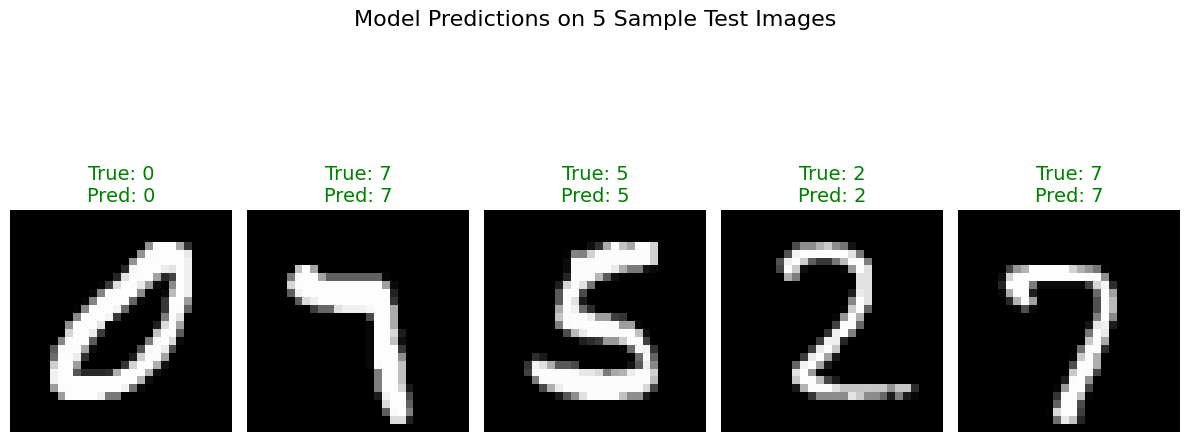

Visualization complete. A plot showing 5 images, their true labels, and predicted labels (colored green for correct, red for incorrect) should be displayed.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Preprocess Data ---
print("Loading and preparing MNIST dataset...")

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to include channel dimension (1 for grayscale)
# The model expects (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# --- 2. Build the CNN Model ---
print("Building CNN model...")

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2)),
    
    # Second Convolutional Block (Increased filters and Dropout)
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Flatten for Dense layers
    Flatten(),
    
    # Dense Layers
    Dense(128, activation='relu'),
    Dropout(0.5), # Regularization to prevent overfitting
    Dense(10, activation='softmax') # Output layer with 10 classes (0-9)
])

# --- 3. Compile the Model ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse since labels are integers (0-9)
              metrics=['accuracy'])

model.summary()

# --- 4. Train the Model ---
print("Training model (this may take a few minutes)...")

# Using a validation split to monitor performance during training
history = model.fit(
    x_train, 
    y_train, 
    epochs=5, 
    batch_size=128, 
    validation_split=0.1, 
    verbose=1
)

# --- 5. Evaluate the Model ---
print("\nEvaluating model performance...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

if accuracy > 0.95:
    print("--- SUCCESS: Test accuracy is above the 95% goal! ---")
else:
    print("Test accuracy is below 95%. Consider training for more epochs or modifying the architecture.") 

# Save the trained model
model.save('mnist_cnn_model.h5')

# --- 6. Visualize Predictions ---
print("\nVisualizing 5 sample predictions...")

# Select 5 random indices from the test set
n_samples = 5
# Ensure the sample indices are within the test set size
sample_indices = np.random.choice(x_test.shape[0], n_samples, replace=False)

# Get the sample images and true labels
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the results
plt.figure(figsize=(12, 6))

for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    # Reshape the 28x28x1 image back to 28x28 for plotting
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    true_label = sample_labels[i]
    pred_label = predicted_labels[i]
    
    # Title color indicates if the prediction was correct
    color = 'green' if true_label == pred_label else 'red'
    title = f"True: {true_label}\nPred: {pred_label}"
    
    plt.title(title, color=color, fontsize=14)
    plt.axis('off')

plt.suptitle("Model Predictions on 5 Sample Test Images", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

print("Visualization complete. A plot showing 5 images, their true labels, and predicted labels (colored green for correct, red for incorrect) should be displayed.")
